<a href="https://colab.research.google.com/github/DzhuJK/Chiselni-Metodi/blob/main/%D0%9B%D0%A04_%D0%9B%D0%B0%D1%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лац Варвара
Лабораторна робота №4
Варіант 9
Група 2-8

In [2]:
!pip install numpy

In [5]:
import numpy as np
numpy_version = np.__version__
print(f"NumPy version: {numpy_version}")

NumPy version: 1.26.4


1. Знайти матрицю С=АВ-ВА

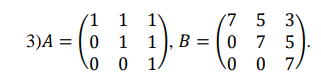

In [10]:
#  С=АВ-ВА
a = np.matrix([[1, 1, 1], [0, 1, 1], [0, 0, 1]])
b = np.matrix([[7, 5, 3], [0, 7, 5], [0, 0, 7]])
ab = np.dot(a, b)
ba = np.dot(b, a)
print("Добуток матриці ab:")
print(ab)
print("Добуток матриці ba:")
print(ba)
c = ab - ba
print("Матриця С:")
print(c)

Добуток матриці ab:
[[ 7 12 15]
 [ 0  7 12]
 [ 0  0  7]]
Добуток матриці ba:
[[ 7 12 15]
 [ 0  7 12]
 [ 0  0  7]]
Матриця С:
[[0 0 0]
 [0 0 0]
 [0 0 0]]


2. Піднести матрицю до степення

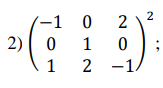

In [12]:
c = np.array([
    [-1, 0, 2],
    [0, 1, 0],
    [1, 2, -1]
])
a = np.dot(c, c)
print("Матриця піднесена до степеня:")
print(a)


Матриця піднесена до степеня:
[[ 3  4 -4]
 [ 0  1  0]
 [-2  0  3]]


3. Знайти добуток матриць

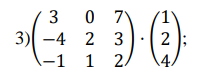

In [13]:
a = np.matrix([[3, 0, 7], [-4, 2, 3], [-1, 1, 2]])
b = np.matrix([[1], [2], [4]])
c = np.dot(a, b)
print("Добуток матриць:")
print(c)

Добуток матриць:
[[31]
 [12]
 [ 9]]


4. Обчислити визначник

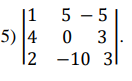

In [14]:
a = np.array([[1, 5, -5], [4, 0, 3], [2, -10, 3]])
a_det = np.linalg.det(a)
print("Визначник матриці:")
print(a_det.round(2))

Визначник матриці:
200.0


5. Обчислити визначник

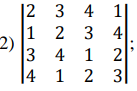

In [15]:
a = np.array([[2, 3, 4, 1], [1, 2, 3, 4], [3, 4, 1, 2], [4, 1, 2, 3]])
a_det = np.linalg.det(a)
print("Визначник матриці:")
print(a_det.round(2))

Визначник матриці:
-160.0


6. Знайти обернену матрицю до матриці

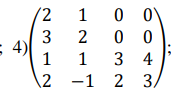

In [16]:
a = np.matrix([[2, 1, 0, 0], [3, 2, 0, 0], [1, 1, 3, 4], [2, -1, 2, 3]])
a_inv = np.linalg.inv(a)
print("Обернена матриця:")
print(a_inv)

Обернена матриця:
[[  2.  -1.   0.   0.]
 [ -3.   2.  -0.  -0.]
 [ 31. -19.   3.  -4.]
 [-23.  14.  -2.   3.]]


7. Визначити ранг матриці

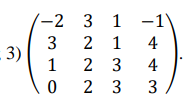

In [43]:
a = np.matrix([[-2, 3, 1, -1], [3, 2, 1, 4], [1, 2, 3, 4], [0, 2, 3, 3]])
rank = np.linalg.matrix_rank(a)
print("Ранг матриці:")
print(rank)

Ранг матриці:
3


8. Розв'язати систему лінійних рівнянь методом Крамера, матричним методом (тобто обчислити обернену матрицю) і м. Гауса. Потім зробити перевірку за допомогою solve() пакету linalg.

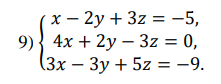

In [42]:
# Розв*язання систем лінійних рівнянь.

import numpy as np

# Матричний метод
def matrix_method(coefficients, constants):
    try:
        inverse_matrix = np.linalg.inv(coefficients)
        solution = np.dot(inverse_matrix, constants)
        # Округлення до найближчого цілого числа
        return np.round(solution).astype(int)
    except np.linalg.LinAlgError as e:
        print("Помилка при обчисленні оберненої матриці:", e)
        return None

# Метод Крамера
def cramer_method(coefficients, constants):
    det_coefficients = np.linalg.det(coefficients)
    solutions = []
    for i in range(len(coefficients)):
        modified_coefficients = np.copy(coefficients)
        modified_coefficients[:, i] = constants
        solutions.append(round(np.linalg.det(modified_coefficients) / det_coefficients, 1))  # Округлюємо до десятих
    return solutions

#Метод Гауса

def gauss_method(a, b):
    n = len(b)

    for k in range(0, n-1):
        for i in range(k+1, n):
            if a[i, k] != 0.0:
                lam = a[i, k] / a[k, k]
                a[i, k+1:n] = a[i, k+1:n] - lam * a[k, k+1:n]
                b[i] = b[i] - lam * b[k]

    x = np.zeros(n)
    for k in range(n-1, -1, -1):
        x[k] = (b[k] - np.dot(a[k, k+1:n], x[k+1:n])) / a[k, k]

    return x

def main():
    a = np.array([[1.0, -2.0, 3.0],
                  [4.0, 2.0, -3.0],
                  [3.0, -3.0, 5.0]])

    b = np.array([-5.0, 0.0, -9.0])

    # Матричний метод
    x_matrix = matrix_method(a, b)
    print("Матричний метод:", x_matrix)

    # Метод Крамера
    x_cramer = cramer_method(a, b)
    print("Метод Крамера:", x_cramer)

    # Метод Гауса
    x_gauss = gauss_method(a, b)
    print("Метод Гауса:", x_gauss)


if __name__ == "__main__":
    main()


Матричний метод: [-1  2  0]
Метод Крамера: [-1.0, 2.0, 0.0]
Метод Гауса: [-1.  2.  0.]


In [39]:
a = np.array([[1.0, -2.0, 3.0],
                  [4.0, 2.0, -3.0],
                  [3.0, -3.0, 5.0]])

b = np.array([-5.0, 0.0, -9.0])
x = np.linalg.solve(a, b)
print('Перевірка:')
print('x =', x.round(1))

Перевірка:
x = [-1.  2. -0.]


2. Розв'язати 1 завдання з наведених нижче

Створіть прямокутну матрицю А, яка має N рядків і M стовпці з випадковими елементами. Визначте, скільки негативних елементів міститься в кожному стовпці та в кожному рядку матриці

In [46]:
import numpy as np

def create_matrix(N, M):
    matrix = np.random.randint(-10, 11, size=(N, M))
    return matrix

def count_negative_elements(matrix):
    negative_counts_rows = np.sum(matrix < 0, axis=1)

    negative_counts_cols = np.sum(matrix < 0, axis=0)

    return negative_counts_rows, negative_counts_cols

def main():
    N = 4
    M = 5

    matrix = create_matrix(N, M)
    print("Матриця:")
    print(matrix)

    negative_counts_rows, negative_counts_cols = count_negative_elements(matrix)

    print("Кількість негативних елементів у кожному рядку:")
    print(negative_counts_rows)

    print("Кількість негативних елементів у кожному стовпці:")
    print(negative_counts_cols)

if __name__ == "__main__":
    main()


Матриця:
[[  1   6  -1   7   7]
 [  0 -10   3  -5  -6]
 [ -2  -2   2   2   9]
 [  8  -4  10 -10  -3]]
Кількість негативних елементів у кожному рядку:
[1 3 2 3]
Кількість негативних елементів у кожному стовпці:
[1 3 1 2 2]
